In [134]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [135]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [136]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [137]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_crypto = StandardScaler().fit_transform(market_data_df)

scaled_crypto[0:5]

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051],
       [-0.04076438, -0.81092807,  0.24945797, -0.05038797, -0.37316402,
        -0.45825882, -0.29554614],
       [ 1.19303608,  2.00095907,  1.76061001,  0.54584206, -0.29120287,
        -0.49984776, -0.27031695]])

In [138]:
# Create a DataFrame with the scaled data
scaled_crypto_df = pd.DataFrame(
    scaled_crypto,
    columns=[
        "price_change_percentage_24h",
        "price_change_percentage_7d",
        "price_change_percentage_14d",
        "price_change_percentage_30d",
        "price_change_percentage_60d",
        "price_change_percentage_200d",
        "price_change_percentage_1y]",
    ],
)
# Copy the crypto names from the original data
scaled_crypto_df["coin_id"] = market_data_df.index

# Set the coinid column as index
scaled_crypto_df.set_index("coin_id", inplace=True)

# Display sample data
scaled_crypto_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y]
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [139]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i,n_init='auto', random_state=1)
    k_model.fit(scaled_crypto_df)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow.head()

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051


In [140]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_curve = df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)
elbow_curve

:Curve   [k]   (inertia)

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** From the elbow 4 is the best value for k.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [141]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [142]:
# Fit the K-Means model using the scaled data
model.fit(scaled_crypto_df)

/Users/silas/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=1)

In [143]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_4 = model.predict(scaled_crypto_df)

# View the resulting array of cluster values.
print(k_4)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [144]:
# Create a copy of the DataFrame
predicted_crypto_df = scaled_crypto_df.copy()

In [145]:
# Add a new column to the DataFrame with the predicted clusters
predicted_crypto_df['clusters'] = k_4

# Display sample data
predicted_crypto_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y],clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

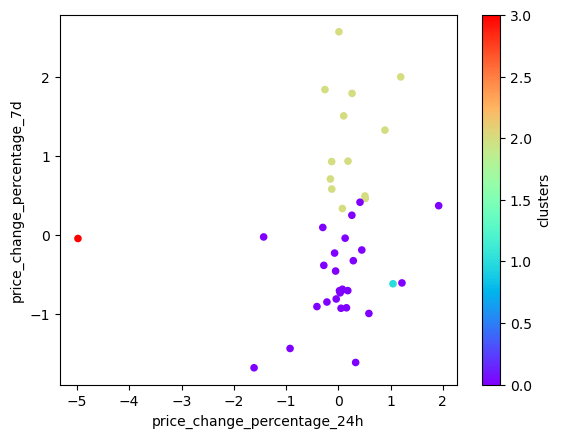

In [146]:
# Create a scatter plot using Pandas plot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
predicted_crypto_df.plot.scatter(
    x="price_change_percentage_24h", y="price_change_percentage_7d", c="clusters", colormap="rainbow"
)

<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

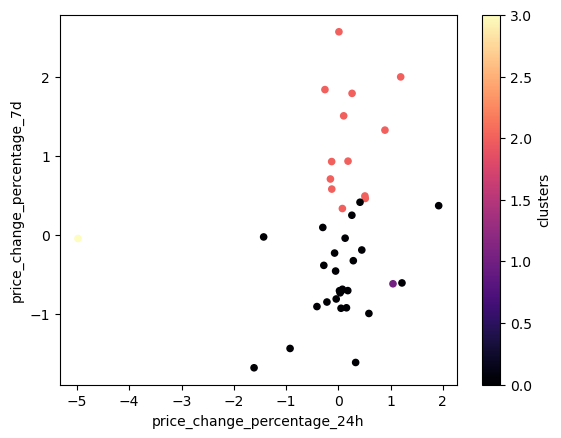

In [147]:
# I am colorblind and the rainbow color theme is hard for me to read, I used magma so I can see the plot better.
predicted_crypto_df.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="clusters",
    colormap="magma",
)

### Optimize Clusters with Principal Component Analysis.

In [148]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [149]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_crypto = pca.fit_transform(scaled_crypto_df)

# View the first five rows of the DataFrame.
pca_crypto[0:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [150]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

# Print the sum of the explained variance ratios to answer the question below
print("Sum of Explained Variance Ratios:")
print(sum(pca.explained_variance_ratio_))

Explained Variance Ratio:
[0.3719856  0.34700813 0.17603793]
Sum of Explained Variance Ratios:
0.8950316570309842


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance is 89.5%

In [151]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
crypto_pca_df = pd.DataFrame(pca_crypto, columns=["PC1", "PC2", "PC3"])

# Copy the crypto names from the original data
crypto_pca_df["coin_id"] = market_data_df.index

# Set the coinid column as index
crypto_pca_df.set_index("coin_id", inplace=True)

# Display sample data
crypto_pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [152]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    k_model.fit(crypto_pca_df)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)

# Display the DataFrame
df_elbow_pca

,k,inertia
0,1,256.874086
1,2,182.339530
2,3,135.442408
3,4,49.665497
4,5,38.672582
5,6,34.507577
6,7,23.728365
7,8,18.574523
8,9,15.572672
9,10,11.407667


In [153]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbow_pca = df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)
df_elbow_pca  

:Curve   [k]   (inertia)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4 Clusters


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, it does not differ from the original data.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [154]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4)

In [155]:
# Fit the K-Means model using the PCA data
model.fit(crypto_pca_df)

/Users/silas/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [156]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_clusters = model.predict(crypto_pca_df)

# Print the resulting array of cluster values.
print(pca_clusters)

[3 3 0 0 3 3 3 3 3 0 0 0 0 3 0 3 0 0 3 0 0 3 0 0 0 0 0 0 3 0 0 0 1 3 0 0 2
 0 0 0 0]


In [157]:
# Create a copy of the DataFrame with the PCA data
crypto_pca_predictions_df = crypto_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
crypto_pca_predictions_df['crypto_cluster'] = pca_clusters

# Display sample data
crypto_pca_predictions_df.head()

,PC1,PC2,PC3,crypto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,3
ethereum,-0.458261,0.458466,0.952877,3
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,3


In [158]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`.

crypto_pca_predictions_df.hvplot.scatter(
    x="PC1",
    y="PC2",
    c="crypto_cluster",
    title="Crypto Clustering with PCA",
    colormap="magma",
)

:Scatter   [PC1]   (PC2,crypto_cluster)

### Determine the Weights of Each Feature on each Principal Component

In [159]:
# Use the columns from the original scaled DataFrame as the index.
cryptos_pca_component_weights = pd.DataFrame(
    pca.components_.T,
    columns=["PC1", "PC2", "PC3"],
    index=scaled_crypto_df.columns,
)
cryptos_pca_component_weights

,PC1,PC2,PC3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y],0.568379,-0.150789,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 

PC1:

* **Strongest Positive: price_change_percentage_200d**
* **Strongest Negative: price_change_percentage_24h**

PC2:

* **Strongest Positive: price_change_percentage_30d**
* **Strongest Negative: price_change_percentage_1y**

PC3:

* **Strongest Positive: price_change_percentage_7d**
* **Strongest Negative: price_change_percentage_60d**
    